In [8]:
import os
import numpy as np
from base import *

pth = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\human skin\test model'
pthim = os.path.join(pth, '10x')
umpix = 1
pthtest = os.path.join(pth, 'testing annotations')
pthtestim = os.path.join(pthtest, '10x')
nm = 'ANACODA_09_13_2024_TA_205'

WS = [[0, 0, 2, 0, 2, 0, 1, 0, 2], [9, 8], 
      [1, 2, 3, 4, 5, 6, 7, 5, 8], 
      [8, 5, 4, 7, 6, 2, 1, 3, 9], []]

numclass = max(WS[2])
sxy = 1024
pthDL = os.path.join(pth, nm)
nblack = numclass + 1
nwhite = WS[1][0]
cmap = np.array([[102, 51, 0],
                  [1, 109, 157],
                  [81, 179, 93],
                  [250, 213, 164],
                  [255, 51, 0],
                  [255, 244, 25],
                  [255, 189, 222],
                  [255, 255, 255]])
classNames = ['follicle', 'sweat gland', 'oil gland', 'epidermis','collagen','blood vessel','fat','whitespace']
classCheck = []
ntrain = 15
nvalidate = np.ceil(ntrain/5)
numims = 2

Saving model metadata and classification colormap...
Net file already exists, updating data...


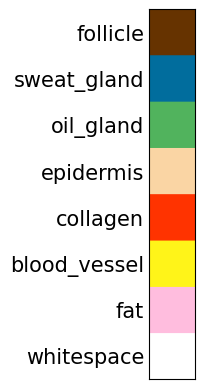

In [9]:
save_model_metadata(pthDL, pthim, WS, nm, umpix, cmap, sxy, classNames, ntrain, nvalidate)

In [10]:
[ctlist0, numann0] = load_annotation_data(pthDL, pth, pthim, classCheck)

 
Importing annotation data...
 
 Making downsampled images...
Image 1 of 5: OTS-21-11041 - 2021-11-15 12.13.09
 annotation data previously loaded
Image 2 of 5: OTS-21-11041 - 2021-11-15 13.26.29
 annotation data previously loaded
Image 3 of 5: OTS-21-11041 - 2021-11-15 14.36.12
 annotation data previously loaded
Image 4 of 5: OTS-21-11041 - 2021-11-15 15.53.22
 annotation data previously loaded
Image 5 of 5: OTS-21-11041 - 2021-11-15 16.47.58
 annotation data previously loaded


In [ ]:
create_training_tiles(pthDL, numann0, ctlist0)


Calculating total number of pixels in the training dataset...
 There are 386718100.0 pixels of follicle. This is the most common class.
 There are 49596100.0 pixels of sweat gland, 12% of the most common class.
 There are 114012000.0 pixels of oil gland, 29% of the most common class.
 There are 193555000.0 pixels of epidermis, 50% of the most common class.
 There are 368207700.0 pixels of collagen, 95% of the most common class.
 There are 29647700.0 pixels of blood vessel, 7% of the most common class.
 There are 99208000.0 pixels of fat, 25% of the most common class.
 There are 265290000.0 pixels of whitespace, 68% of the most common class.

Building training tiles...


In [ ]:
train_segmentation_model(pthDL, fine_tune=False)

In [ ]:
test_segmentation_model(pthDL, pthtest, pthtestim)

In [ ]:
classify_images(pthim,pthDL)

In [11]:
import shutil
import os
import glob

tenxlucie = r'\\10.99.68.52\KiemenData\Mimi Canto\10x'
pthtraining = r'\\10.99.68.52\Kiemendata\Valentina Matos\LG HG PanIN project\LGHG segmentation\10x'
pthndpi = r'\\10.99.68.52\Kiemendata\Valentina Matos\LG HG PanIN project\LGHG segmentation'
listndpi = [os.path.basename(f) for f in glob.glob(os.path.join(pthndpi, '*.ndpi'))]
listtriani = os.listdir(pthtraining)
listimlucie = os.listdir(tenxlucie)

for im in listndpi:
    tif = im[:-4] + 'tif'
    if not os.path.exists(os.path.join(pthtraining, tif)):
        print(tif)
        shutil.copy(os.path.join(tenxlucie, tif), os.path.join(pthtraining, tif))


S14-13514 1O.tif


In [3]:
import os
import pickle
pth = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\mouse lung\annotations\09_30_2024'
with open(os.path.join(pth, 'net.pkl'), 'rb') as f:
    data = pickle.load(f)
print(data)

{'pthim': '//10.99.68.52/Kiemendata/Valentina Matos/tissues for methods paper/mouse lung/annotations\\5x', 'pthDL': '//10.99.68.52/Kiemendata/Valentina Matos/tissues for methods paper/mouse lung/annotations\\09_30_2024', 'WS': [[0, 0, 0, 0, 0, 0, 0], [6, 7], [1, 2, 3, 4, 1, 5, 6], [7, 4, 3, 2, 1, 6], [5]], 'nm': '09_30_2024', 'umpix': 2, 'cmap': array([[  0,   0, 127],
       [  0,  85, 127],
       [170,   0,   0],
       [170, 170, 127],
       [255, 170, 255],
       [255, 128,   0]]), 'sxy': 1024, 'classNames': ['bronchioles', 'alveoli', 'vasculature', 'mets', 'whitespace', 'collagen', 'black'], 'ntrain': 15, 'nblack': 7, 'nwhite': 5, 'final_df':     Layer Name          Color Whitespace Settings  Delete layer  \
0  bronchioles    (0, 255, 0)                   0         False   
1      alveoli  (255, 255, 0)                   0         False   
2  vasculature    (255, 0, 0)                   0         False   
3         mets  (0, 255, 255)                   0         False   
4  non